# Advanced Data Analytics

Part 2 - Data Visualization

## Wieso sind Visualisierungen so wichtig?




In [1]:
library(dplyr)
data(anscombe)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
anscombe %>% summarise(across(x1:y4, mean))

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,9,9,9,7.500909,7.500909,7.5,7.500909


In [3]:
anscombe %>% summarise(across(x1:y4, var))

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,11,11,11,4.127269,4.127629,4.12262,4.123249


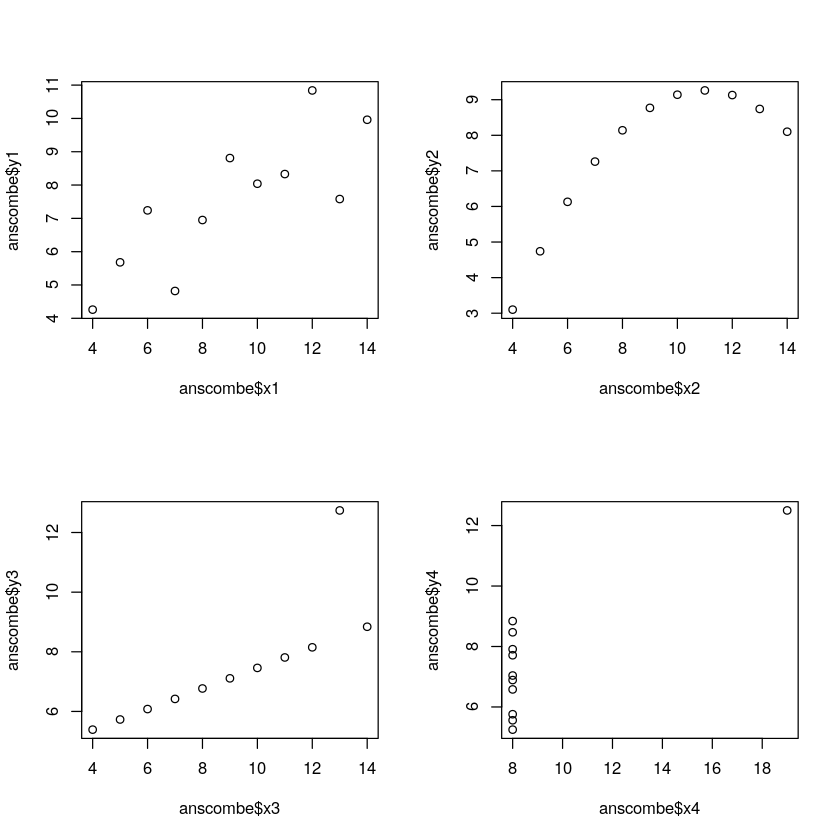

In [4]:
par(mfrow = c(2,2)) #zeigt plots in 2x2 Fenster an
plot(anscombe$x1,anscombe$y1)
plot(anscombe$x2,anscombe$y2)
plot(anscombe$x3,anscombe$y3)
plot(anscombe$x4,anscombe$y4)

## R base plots

R bietet bereits viele schnelle Möglichkeiten um einfache Visualisierungen zu gestalten.
* plot()
* hist()
* boxplot()
* barplot()

Graphical Parameters
* pch: Anpassung des Symbols (Default=Kreis)
* col: Die Farbe spezifieziert als Nummer, String oder hex-code (all possible colours() funktion)
* xlab: character string for the x-axis label
* ylab: character string for the y-axis label

Titel und Legenden können nur statisch gesetzt werden
* title()
* legend()


In [5]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
plot(x=mtcars$hp,y=mtcars$mpg)

In [ ]:
plot(x=mtcars$hp,y=mtcars$mpg,pch=mtcars$cyl,col=mtcars$cyl)

In [ ]:
plot(x=mtcars$hp,y=mtcars$mpg,pch=mtcars$cyl,col=mtcars$cyl, xlab="Verbrauch (mpg)", ylab="Pferdestärke")

In [ ]:
plot(x=mtcars$hp,y=mtcars$mpg,pch=mtcars$cyl,col=mtcars$cyl, xlab="Pferdestärke", ylab="Reichweite (mpg)")
title("Pferdestärke vs. Reichweite (mpg)")
legend("topright", pch = c(4,6,8), col = c(4,6,8), legend = c("4 Zylinder","6 Zyinder", "8 Zylinder"))

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)

In [ ]:
par(mfrow=c(2,2))
hist(mtcars$hp)
boxplot(mtcars$hp)
barplot(table(mtcars$cyl))

## Visualisierungen mit ggplot2
Während mit RBase relativ schnell und einfach Graphiken erstellt werden können, fehlt es an Customizing und Flexibilität. Um Customizing und Flexibilität zu erreichen und dabei noch möglichst einfach und strukturiert arbeiten zu können wurde das Paket ggplot2 von Hadley Wickham entwickelt (https://ggplot2-book.org/)

ggplot2 cheat sheet: https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf

### Grammar of Graphics
Für Visualisierung gibt essenzielle Elemente die benötigt werden. 
1. Data Layer - Das Dataset
2. Aesthetics Layer - Skalas, auf die wir unsere Daten Mappen möchten (zB x,y,col,fill,group)
3. Geometries Layer - Die visuellen Elemente die wir benutzen wollen

Zusätzlich gibt es noch 4 weitere, optionale Elemente

4. Facets - Facetten, kleine subplots die jeweils Subsets des Datensatzes behandeln
5. Statistics - Zusätzliche Statistiken die helfen, die Daten besser zu verstehen (zB lineare Modelle)
6. Coordinaten - Der Raum, den wir anzeigen möchten
7. Theme - Visuelle Eemente die nichts mit den Ursprünglichen Daten zu tun haben

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

In [ ]:
library(ggplot2)

In [ ]:
ggplot(mtcars, #data layer
      aes(x=mpg,y=hp)) + #aesthetics layer
    geom_point() #geometries layer

### Aesthetics Layer
Typische Aesthetics sind:
* col und fill
* size
* shape
* linetype
* alpha (Deckkraft/Durchsichtigkeit)
* group
* weight

In [ ]:
ggplot(mtcars, #data layer
      aes(x=mpg,y=hp,col=as.factor(cyl),shape=as.factor(cyl))) + #aesthetics layer
    geom_point() #geometries layer

### Geometrics Layer

Viele mögliche Geometric Layers. Die Häufigsten:
* geom_histogram (1 continuous variable)
* geom_point (2 coninuous variablen)
* geom_col = Bar-Plots (1 continuous variable + optional discrete Variable)
* geom_boxplot (1 continuous variable + optional discrete Variable)

Weitere interessante Geometrics:
* geom_smooth (fitted ein lineares Modell anhand der Daten)
* geom_jitter (quasi geom_point aber für discrete Variablen)
* geom_violin (Violinen - Plot. Werden wir in der Übung nutzen)

Cheat Sheet mit allen möglichen Geometrics https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf

In [ ]:
ggplot(mtcars, #data layer
      aes(x=hp)) + #aesthetics layer
    geom_histogram(bins=10, fill="antiquewhite3",col="black") #geometries layer

In [ ]:
ggplot(mtcars, #data layer
      aes(x=cyl,y=1,fill=as.factor(cyl))) + #aesthetics layer
    geom_col() #geometries layer

In [ ]:
ggplot(mtcars, #data layer
      aes(x=as.factor(cyl),y=hp,group=as.factor(cyl),fill=as.factor(cyl))) + #aesthetics layer
    geom_boxplot() #geometries layer

### Facets

In [ ]:
ggplot(mtcars, #data layer
      aes(x=mpg,y=hp,col=as.factor(cyl),shape=as.factor(cyl))) + #aesthetics layer
    geom_point() + #geometries layer
    facet_wrap(.~cyl)

### Statistics
Beispiel: geom_smooth mit linearem Modell

In [ ]:
ggplot(mtcars, aes(x=mpg,y=hp)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

In [ ]:
ggplot(mtcars, aes(x=mpg,y=hp,col=as.factor(cyl),shape=as.factor(cyl))) + #aesthetics layer + data layer
    geom_point() + #geometries layer
    facet_wrap(.~cyl) + #facet
    stat_smooth(method = "lm", se = FALSE) #statistic

### Coordinates
typischerweise genutzt für Zooming-In und -Out

In [ ]:
ggplot(mtcars, aes(x=mpg,y=hp)) +
    geom_point() +
    stat_smooth(method = "lm", se = FALSE) +
    coord_cartesian(xlim = c(0, 35), ylim = c(0, 300))

### Themes
Mit Themes kann man alles, was nicht direkt mit den Daten zusammenhängt verändern. So zum Beispiel Beschriftungen und Titel. Aber auch Hintergründe und Achsenlinien. 

Häufigste Themes:
* theme_gray() ist der default
* theme_bw() (schwarz-weiß)
* theme_classic()
* theme_minimal

Mehr Infos: https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf

In [ ]:

p1 <- ggplot(mtcars, aes(x=mpg,y=hp)) +
    geom_point() +
    stat_smooth(method = "lm", se = FALSE) +
    coord_cartesian(xlim = c(0, 35), ylim = c(0, 300))
require(gridExtra)



grid.arrange(p1 + theme_gray(), 
             p1 + theme_bw(),
             p1 + theme_classic(),
             p1 + theme_minimal(),
             ncol=2)


In [ ]:
ggplot(mtcars, aes(x=mpg,y=hp,col=as.factor(cyl),shape=as.factor(cyl)))  +
    geom_point() +
    stat_smooth(method = "lm", se = FALSE) +
    coord_cartesian(xlim = c(0, 35), ylim = c(0, 300))+
    theme_minimal()+
    labs(x="Reichweite",y="Pferdestärke",title="Pferdestärke vs Reichweite", subtitle="Reichweite gemessen in Miles per Gallon (mpg)")+
    theme(legend.position="bottom") +
    guides(col=guide_legend(title="Zylinder"),shape=guide_legend(title="Zylinder"))+
    annotate(geom="Text",label="Das ist ein lineares Modell \n für die Relation PS/mpg", 30,200)

### Kombination mit dplyr

So wie in dplyr Daten durch die Pipe %>% weitergereicht werden können, so können die Daten auch mit der pipe an ggplot übergeben werden.

In [ ]:
mtcars %>% 
    mutate(Auto=rownames(mtcars),
            Gewicht = round(wt *1000 * 0.4536,2),
            "l100km" =  235/mtcars[,"mpg"],
            Typ = ifelse(am==0,"Automatik","Manuell")
            ) %>%
    rename("Viertelmeile" = qsec, "Pferdestärke" = hp) %>%
    ggplot(aes(x=Gewicht, y= l100km)) +
        geom_point()
